<!-- Steps to Approach the Project:

Understand the Data:

Load the dataset and visualize some images to get a sense of the data.
Analyze the distribution of pixel values.
Preprocess the Data:

Consider scaling or normalizing the data.
Optionally apply dimensionality reduction techniques to reduce noise and computation time.
Choose a Clustering Algorithm:

Select an appropriate clustering algorithm.
Justify your choice based on the data characteristics.
Cluster the Data:

Apply the clustering algorithm to assign cluster labels to each image.
Ensure that cluster labels are integers from 1 to 10.
Evaluate and Iterate:

Since you don't have true labels, use internal validation metrics (like silhouette score) to assess clustering quality.
Iterate on preprocessing and algorithm parameters to improve clustering. -->

# Steps to Approach the Project:

## Understand the Data:

Load the dataset and visualize some images to get a sense of the data.
Analyze the distribution of pixel values.
## Preprocess the Data:
Consider scaling or normalizing the data.
Optionally apply dimensionality reduction techniques to reduce noise and computation time.

## Choose a Clustering Algorithm:
Select an appropriate clustering algorithm.
Justify your choice based on the data characteristics.

## Cluster the Data:
Apply the clustering algorithm to assign cluster labels to each image.
Ensure that cluster labels are integers from 1 to 10.

## Evaluate and Iterate:
Since you don't have true labels, use internal validation metrics (like silhouette score) to assess clustering quality.
Iterate on preprocessing and algorithm parameters to improve clustering.

In [1]:
%matplotlib inline
!pip install umap-learn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import umap.umap_ as umap

Data shape: (10740, 784)


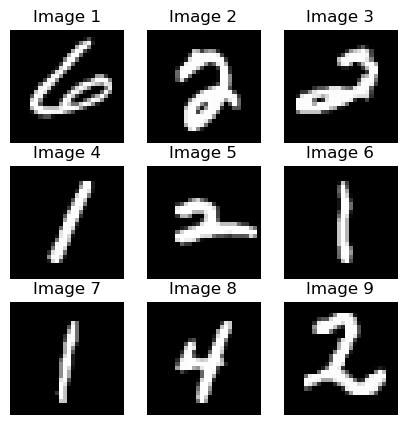

In [3]:
data = np.loadtxt('new_test.txt', delimiter=',')
print("Data shape:", data.shape)
# Normalize the data
# data_normalized = data / 255.0
# pca = PCA()
# pca.fit(data_normalized)
# data_pca = pca.fit_transform(data_normalized)
# print("Shape of PCA-transformed data:", data_pca.shape)

# Visualize the first image
num_images = 9  # Number of images to display
plt.figure(figsize=(5, 5))

for i in range(num_images):
    # Get the image vector and reshape
    image_vector = data[i]
    image_matrix = image_vector.reshape(28, 28)
    # Add a subplot
    plt.subplot(3, 3, i+1)
    plt.imshow(image_matrix, cmap='gray')
    plt.title(f'Image {i+1}')
    plt.axis('off')

#plt.tight_layout()
plt.show()

In [4]:
# from sklearn.cluster import KMeans

# # Set the number of clusters
# K = 10

# # Instantiate the KMeans algorithm
# kmeans = KMeans(n_clusters=K, random_state=42)

# # Fit the model to the PCA-transformed data
# cluster_labels = kmeans.fit_predict(data_pca)

# # Prepare the submission file
# cluster_array = submission.values

# # Save to a text file with one integer per line
# np.savetxt('cluster_assignments.txt', cluster_array, fmt='%d')


In [5]:
class KMeans:
    def __init__(self, n_clusters, max_iter=10000, tol=1e-4):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None

    def fit(self, data):
        # Initialize centroids randomly from the data points
        self.centroids = data[np.random.choice(range(len(data)), self.n_clusters, replace=False)]

        for i in range(self.max_iter):
            # Assign clusters
            distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            
            # Compute new centroids
            new_centroids = np.array([data[self.labels == j].mean(axis=0) for j in range(self.n_clusters)])

            # Check for convergence
            if np.all(np.abs(new_centroids - self.centroids) <= self.tol):
                break
            self.centroids = new_centroids

        return self

    # predict the labels
    def predict(self, data):
        distances = np.linalg.norm(data[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    # calculate sum of squared distance error
    def sse(self, data):
        # Calculate distances from each point to its assigned centroid
        distances = np.sqrt(((data - self.centroids[self.labels, :])**2).sum(axis=1))
        # Sum of squared distances
        return np.sum(distances**2)


In [13]:
scaler = MinMaxScaler()
images_normalized = scaler.fit_transform(data)

# Dimension reduction 
pca = PCA(n_components=50, random_state=42)
data_pca = pca.fit_transform(images_normalized)

umap_reducer = umap.UMAP(
    n_components=50,
    n_neighbors=15,
    min_dist=0.0,
    metric='euclidean',
    random_state=42
)
embedding = umap_reducer.fit_transform(images_normalized)

D:\GMU Courses\CS-584\Assignments\HW3\myenv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [14]:
# We know that K value is 10
kmeans = KMeans(n_clusters=10)
kmeans.fit(embedding)
predicted_labels = kmeans.predict(embedding)


In [15]:
sse_value = kmeans.sse(embedding)
print(f'Sum of Squared Errors (SSE): {sse_value:.2f}')

Sum of Squared Errors (SSE): 19810.53


In [9]:
file_name = "format_gridSearch1.txt"
with open(file_name, 'w+') as file:
    for prediction in predicted_labels:
        file.write(str(prediction) + '\n')

print("+++++++++ Prediction written to file: {} +++++++++".format(file_name))

+++++++++ Prediction written to file: format_gridSearch1.txt +++++++++


In [10]:
# # Import necessary libraries
# import numpy as np
# import pandas as pd
# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.pipeline import Pipeline
# from sklearn.cluster import KMeans
# from sklearn.metrics import make_scorer, silhouette_score
# from sklearn.model_selection import GridSearchCV
# import umap

# # Custom transformer for UMAP
# class UMAPTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self, n_neighbors=15, min_dist=0.1, n_components=2, metric='euclidean', random_state=None):
#         self.n_neighbors = n_neighbors
#         self.min_dist = min_dist
#         self.n_components = n_components
#         self.metric = metric
#         self.random_state = random_state
#         self.reducer_ = None

#     def fit(self, X, y=None):
#         self.reducer_ = umap.UMAP(
#             n_neighbors=self.n_neighbors,
#             min_dist=self.min_dist,
#             n_components=self.n_components,
#             metric=self.metric,
#             random_state=self.random_state
#         )
#         self.reducer_.fit(X)
#         return self

#     def transform(self, X):
#         return self.reducer_.transform(X)

# # Load the data


# # Scaling
# scaler = MinMaxScaler()
# data_scaled = scaler.fit_transform(data)

# # Define the pipeline
# pipeline = Pipeline([
#     ('pca', PCA(random_state=42)),
#     ('umap', UMAPTransformer(random_state=42)),
#     ('kmeans', KMeans(random_state=42))
# ])

# # Define the parameter grid
# param_grid = {
#     'pca__n_components': [50, 100, 150, 200],
#     'umap__n_neighbors': [15, 30, 50, 100],
#     'umap__min_dist': [0.0, 0.1, 0.5],
#     'umap__metric': ['euclidean', 'cosine'],
#     'umap__n_components': [50],  # Adjust if you want different UMAP output dimensions
#     'kmeans__n_clusters': [10],  # K is fixed at 10
#     'kmeans__init': ['k-means++', 'random'],
#     'kmeans__n_init': [10]
# }

# # Define a custom scoring function
# def silhouette_scorer(estimator, X):
#     # Transform the data using the pipeline up to the clustering step
#     X_transformed = estimator[:-1].transform(X)
#     # Get cluster labels from KMeans
#     cluster_labels = estimator.named_steps['kmeans'].labels_
#     # Compute the Silhouette Score
#     score = silhouette_score(X_transformed, cluster_labels)
#     return score

# # Create a scorer object
# scorer = make_scorer(silhouette_scorer, greater_is_better=True)

# # Initialize GridSearchCV
# grid_search = GridSearchCV(
#     estimator=pipeline,
#     param_grid=param_grid,
#     scoring=scorer,
#     cv=[(slice(None), slice(None))],
#     verbose=2,
#     n_jobs=-1
# )

# # Fit the grid search
# grid_search.fit(data_scaled)

# # Get the best parameters and score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("\nBest Silhouette Score: {:.4f}".format(best_score))
# print("Best Parameters:")
# for param_name in sorted(best_params.keys()):
#     print(f"{param_name}: {best_params[param_name]}")

# # Get the best estimator
# best_model = grid_search.best_estimator_

# # Transform the data using the best pipeline
# data_transformed = best_model[:-1].transform(data_scaled)

# # Get the cluster labels
# cluster_labels = best_model.named_steps['kmeans'].labels_

# # Adjust labels to start from 1
# cluster_labels_submission = cluster_labels + 1

# # Save the cluster assignments to a text file
# np.savetxt('format_gridSearch.txt', cluster_labels_submission, fmt='%d')

# # Optional: Visualize the clustering results (if data_transformed has 2 components)
# if data_transformed.shape[1] == 2:
#     import matplotlib.pyplot as plt

#     plt.figure(figsize=(8, 6))
#     plt.scatter(
#         data_transformed[:, 0],
#         data_transformed[:, 1],
#         c=cluster_labels,
#         cmap='tab10',
#         s=5
#     )
#     plt.title('Clustering Results with Best Parameters')
#     plt.xlabel('Component 1')
#     plt.ylabel('Component 2')
#     plt.colorbar(label='Cluster Label')
#     plt.show()
